<a href="https://colab.research.google.com/github/XimenaRamirezA/AI-FIME-2024/blob/main/ParteIII_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parte III. Análisis en OpenCV**


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

**Cargar imagen**

array([[[6, 6, 6],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[6, 6, 6],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[5, 5, 5],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
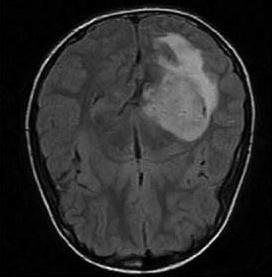

In [ ]:
#Read the image
imgcolor=cv2.imread('BrainTumor_cancer.jpg', cv2.IMREAD_COLOR)
imgcolor

array([[6, 1, 0, ..., 0, 0, 0],
       [6, 1, 0, ..., 0, 0, 0],
       [5, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)
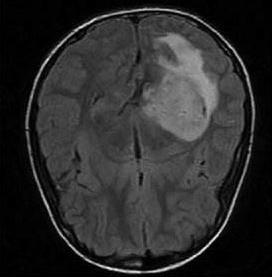

In [ ]:
imgbandw=cv2.imread('BrainTumor_cancer.jpg', cv2.IMREAD_GRAYSCALE)
imgbandw

In [ ]:
print("Dimensión imagen a color: ", imgcolor.shape)
print("Dimensión imagen grises: ", imgbandw.shape)

Dimensión imagen a color:  (277, 272, 3)
Dimensión imagen grises:  (277, 272)


###**Preprocesamiento**

array([[6, 1, 0, ..., 0, 0, 0],
       [6, 1, 0, ..., 0, 0, 0],
       [5, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)
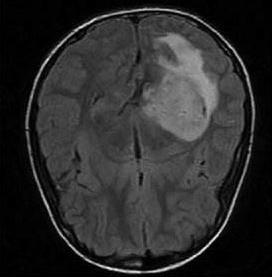

In [ ]:
#convertir a escala de grises
imggray=cv2.cvtColor(imgcolor, cv2.COLOR_BGR2GRAY)
imggray

array([[12,  2,  0, ...,  0,  0,  0],
       [12,  2,  0, ...,  0,  0,  0],
       [10,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4,  4,  4, ...,  2,  2,  2]], dtype=uint8)
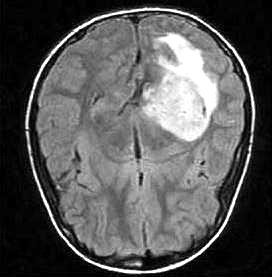

In [ ]:
#aumento contraste
imgproces=cv2.convertScaleAbs(imggray, alpha=2.0, beta=0)
imgproces

array([[75, 17,  0, ...,  0,  0,  0],
       [75, 17,  0, ...,  0,  0,  0],
       [71, 17,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [44, 44, 44, ..., 17, 17, 17]], dtype=uint8)
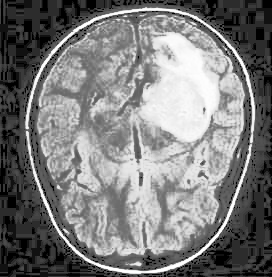

In [ ]:
#ecualización histograma
equ=cv2.equalizeHist(imggray)
equ

En cuanto a las operaciones con las que podemos mejorar la segmentación de la imagen como buscamos segmentar la zona del tumor únicamente a simple vista se podría decir que el aumento por contraste nos deja observar de mejor manera la zona de interés, sin perder su característica.

### **Aplicar segmentación**

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
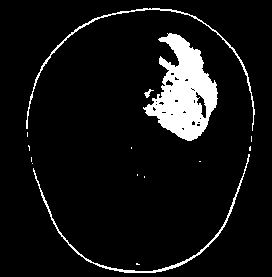

In [ ]:
#segmentación usando el aumento de contraste
umbral=210 #definimos el umbral
ret, thresh=cv2.threshold(imgproces, umbral, 255, cv2.THRESH_BINARY)
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
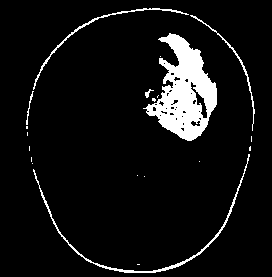

In [ ]:
#segmentación usando la imagen en la que se aplico la ecualización del histograma
umbral=235 #definimos el umbral
ret, thresh=cv2.threshold(equ, umbral, 255, cv2.THRESH_BINARY)
thresh

Después de aplicar la segmentación en ambas imagenes, aplicando tanto el método de ecualización del histograma y el aumento de contraste; no hay mucha diferencia notable en cuanto a la segmentación por umbral.Sin embargo, a simple vista podría decir que se ve mejor la segmentación utilizando el método de aumento de contraste.

In [ ]:
#separar los canales de la imagen
b,g,r=cv2.split(imgcolor)
print(b)
print(g)
print(r)

[[6 1 0 ... 0 0 0]
 [6 1 0 ... 0 0 0]
 [5 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 1 1 1]]
[[6 1 0 ... 0 0 0]
 [6 1 0 ... 0 0 0]
 [5 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 1 1 1]]
[[6 1 0 ... 0 0 0]
 [6 1 0 ... 0 0 0]
 [5 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 1 1 1]]


###**Análisis de características**

In [ ]:
#Análisis de características
# Obtener el área del objeto segmentado
area = np.count_nonzero(thresh)
print(f'Área del objeto segmentado: {area} píxeles')

Área del objeto segmentado: 6193 píxeles


In [ ]:
# Extraer el bounding box del objeto
x, y, w, h = cv2.boundingRect(thresh)

array([[[6, 6, 6],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[6, 6, 6],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[5, 5, 5],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
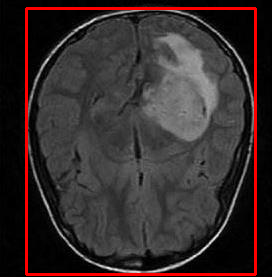

In [ ]:
# Dibujar el bounding box en la imagen original
cv2.rectangle(imgcolor, (x, y), (x + w, y + h), (255, 0, 0), 2)

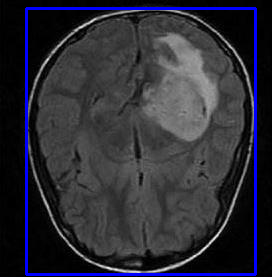

In [ ]:
# Mostrar la imagen con el bounding box
cv2_imshow(imgcolor)